# Project: Learning to Label – From Clustering to Classification text
In the real world, data rarely comes with clean labels. As a machine learning engineer at a data-centric company, you’re handed fairly large, unlabelled datasets across two domains—images and text. Your team is tasked with building a functional classification system, but without labeled training data, the first challenge is to create your own labels. Welcome to your mission: learning to label intelligently and building robust classifiers from scratch.

This project simulates the workflow of a modern unsupervised-to-supervised machine learning pipeline. It is structured in two stages, each of which builds upon the other:

# Text Dataset

In [2]:
import pickle
import pandas as pd

original_text_df = pickle.load(open('train_data_text.pkl', 'rb'))
text_df= pd.DataFrame(original_text_df, columns=['text'])

In [3]:
# remove stop words and lemmatize

import nltk
nltk.download('stopwords')
import re

def process_text(text):
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    lemmatizer= WordNetLemmatizer()
    stop_words= set(stopwords.words('english'))
    text= text.lower()
    processed_text= re.sub(r'[^a-zA-Z0-9\s]','',text)

    token= [ lemmatizer.lemmatize(word) for word in processed_text.split() if word not in stop_words]
    return ' '.join(token)

text_df['processed_text']= text_df['text'].apply(process_text)
text_df 

[nltk_data] Downloading package stopwords to /home/ruksad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  
0     article 93089204431grv101psuvmpsuedu callec dr...  
1     article 1993apr191311027843rchlandibmcom xzz02...  
2     get little uv putting heavy uv filter deep pur...  
3     nntppostinghost accessdigexnet trouble trying ...  
4     understand new gps box option known differenti...  
...                                                 ...  
1495  nntppostinghost wcsubctstateuedu organization ...  
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...  
1497  article 79895cupportalcom thyagicupportalcom t...  
1498  3500 mile black leather tank bra tank bag corb...  
1499  nntppostinghost grissomlarcnasagov article 199...  

[1500 rows x 2 columns]

# create different vectors using vectorization techniques.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


def count_vectorize(df):
    vectorizer= CountVectorizer()
    vectors= vectorizer.fit_transform(df['processed_text']).toarray()
    df['count_vector']= list(vectors)
    return vectors, vectorizer.vocabulary_

def tfidf_vectorizer(df):
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    tfidf_vectors = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()
    df['tfidf_vector'] = list(tfidf_vectors)
    return tfidf_vectors

def word2Vec_vectorizer(df):
    from gensim.models import Word2Vec

    # Train the Word2Vec model
    model = Word2Vec(sentences=df['processed_text'].apply(lambda x: x.split()), vector_size=250, window=5, min_count=1, workers=4)

    # Function to vectorize text using the Word2Vec model
    def vectorize(text):
        words = text.split()
        # Compute the mean of word vectors, or use a zero vector if no words are in the vocabulary
        return np.mean([model.wv[word] for word in words if word in model.wv.key_to_index] or [np.zeros(model.vector_size)], axis=0)

    # Apply the vectorization function to the processed_text column
    df['word2vec'] = df['processed_text'].apply(vectorize)
    return np.array(df['word2vec'].tolist())


In [5]:
# Generate vectorizations 
count_vectors, count_vectorizer_vocab = count_vectorize(text_df)
tfidf_vectors = tfidf_vectorizer(text_df)
word2vec_vectors = word2Vec_vectorizer(text_df)

text_df 


text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
1     article 1993apr191311027843rchlandibmcom xzz02...   
2     get little uv putting heavy uv filter deep pur...   
3     nntppostinghost accessdigexnet trouble trying ...   
4     understand new gps box option known differenti...   
...                                                 ...   
1495  nntppostinghost wcsubctstateuedu organization ...   
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...   
1497  article 79895cupportalcom thyagicupportalcom t...   
1498  3500 mile black leather tank bra tank bag corb...   
1499  nntppostinghost grissomlarcnasagov article 199...   

                                           count_vector  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
1495  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1496  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1497  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1498  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1499  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           tfidf_vector  \
0     [0.13272771583061566, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                 ...   
1495  [0.0, 0.0, 0.0, 0.10147120584977741, 0.1174319...   
1496  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1497  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1498  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1499  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               word2vec  
0     [0.35013324, -0.12795763, 0.27739617, 0.154651...  
1     [0.41103777, -0.1542838, 0.32536867, 0.1788941...  
2     [0.31812993, -0.11551583, 0.25627914, 0.146034...  
3     [0.3037733, -0.10919723, 0.24047652, 0.1336244...  
4     [0.30192563, -0.10717992, 0.24111055, 0.135315...  
...                                                 ...  
1495  [0.30906764, -0.11311608, 0.24301316, 0.134595...  
1496  [0.43706468, -0.15998729, 0.34868774, 0.195686...  
1497  [0.32006788, -0.11719912, 0.25258246, 0.139689...  
1498  [0.29436183, -0.10616315, 0.23545928, 0.131670...  
1499  [0.27935877, -0.10449022, 0.21481554, 0.117372...  

[1500 rows x 5 columns]

In [7]:

# # Save the vectorized data
# np.save('count_vectors.npy', count_vectors)
# np.save('tfidf_vectors.npy', tfidf_vectors)
# np.save('word2vec_vectors.npy', word2vec_vectors)
# # Save the vectorizer   
#with open('count_vectorizer.pkl', 'wb') as f:
#    pickle.dump(count_vectorizer_vocab, f)
# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(tfidf_vectorizer, f)    
# # Save the processed text data
# text_df.to_csv('processed_text.csv', index=False)
# # Save the original text data
# original_text_df.to_csv('original_text.csv', index=False)

In [6]:
# Apply KMeans clustering to count_vector, tfidf_vector, and word2vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# KMeans for count_vector
kmeans_count = KMeans(n_clusters=5, random_state=42)
text_df['count_vector_cluster'] = kmeans_count.fit_predict(np.array(text_df['count_vector'].tolist()))
kmeans_count_lables= kmeans_count.labels_

# KMeans for tfidf_vector
kmeans_tfidf = KMeans(n_clusters=5, random_state=42)
text_df['tfidf_vector_cluster'] = kmeans_tfidf.fit_predict(np.array(text_df['tfidf_vector'].tolist()))
kmeans_tfidf_lables= kmeans_tfidf.labels_

# KMeans for word2vec
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
text_df['word2vec_cluster'] = kmeans_word2vec.fit_predict(np.array(text_df['word2vec'].tolist()))
kmeans_word2vec_lables= kmeans_word2vec.labels_

summary_metrics= pd.DataFrame({
    "Vector Method": ["count-vector", "tf-idf-vector", "word2vec"],
    "Inertia": [
        kmeans_count.inertia_,
        kmeans_tfidf.inertia_,
        kmeans_word2vec.inertia_
    ],
    "Silhouette Score": [
        silhouette_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        silhouette_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        silhouette_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
        ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        calinski_harabasz_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        calinski_harabasz_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        davies_bouldin_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        davies_bouldin_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ]
})

summary_metrics

Vector Method        Inertia  Silhouette Score  Calinski-Harabasz Index  \
0   count-vector  517240.963710          0.882211               579.737830   
1  tf-idf-vector    1386.797543          0.197187               144.834122   
2       word2vec      69.224426          0.513660              1917.797111   

   Davies-Bouldin Index  
0              1.234039  
1              1.430685  
2              0.628881

In [8]:
text_df

text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
1     article 1993apr191311027843rchlandibmcom xzz02...   
2     get little uv putting heavy uv filter deep pur...   
3     nntppostinghost accessdigexnet trouble trying ...   
4     understand new gps box option known differenti...   
...                                                 ...   
1495  nntppostinghost wcsubctstateuedu organization ...   
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...   
1497  article 79895cupportalcom thyagicupportalcom t...   
1498  3500 mile black leather tank bra tank bag corb...   
1499  nntppostinghost grissomlarcnasagov article 199...   

                                           count_vector  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
1495  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1496  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1497  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1498  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1499  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                           tfidf_vector  \
0     [0.13272771583061566, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                 ...   
1495  [0.0, 0.0, 0.0, 0.10147120584977741, 0.1174319...   
1496  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1497  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1498  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1499  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               word2vec  count_vector_cluster  \
0     [0.35013324, -0.12795763, 0.27739617, 0.154651...                     0   
1     [0.41103777, -0.1542838, 0.32536867, 0.1788941...                     0   
2     [0.31812993, -0.11551583, 0.25627914, 0.146034...                     0   
3     [0.3037733, -0.10919723, 0.24047652, 0.1336244...                     0   
4     [0.30192563, -0.10717992, 0.24111055, 0.135315...                     0   
...                                                 ...                   ...   
1495  [0.30906764, -0.11311608, 0.24301316, 0.134595...                     0   
1496  [0.43706468, -0.15998729, 0.34868774, 0.195686...                     0   
1497  [0.32006788, -0.11719912, 0.25258246, 0.139689...                     0   
1498  [0.29436183, -0.10616315, 0.23545928, 0.131670...                     0   
1499  [0.27935877, -0.10449022, 0.21481554, 0.117372...                     0   

      tfidf_vector_cluster  word2vec_cluster  
0                        3                 0  
1                        1                 3  
2                        2                 4  
3                        3                 4  
4      

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from umap.umap_ import UMAP
# Method 1: Apply t-SNE
def apply_tsne(data, n_components=2, random_state=42):
    """
    Applies t-SNE to reduce data to n_components dimensions.
    
    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for t-SNE.
        random_state (int): Random state for reproducibility.
    
    Returns:
        numpy.ndarray: t-SNE reduced data.
    """
    tsne = TSNE(n_components=n_components, random_state=random_state)
    return tsne.fit_transform(data)

# Method 2: Apply PCA
def apply_pca(data, n_components=2):
    """
    Applies PCA to reduce data to n_components dimensions.
    
    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for PCA.
    
    Returns:
        numpy.ndarray: PCA reduced data.
    """
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

def apply_umap(data, n_components=2, random_state=42):
    """
    Applies UMAP to reduce data to n_components dimensions.

    Parameters:
        data (numpy.ndarray): Input data to reduce.
        n_components (int): Number of dimensions for UMAP.
        random_state (int): Random state for reproducibility.

    Returns:
        numpy.ndarray: UMAP reduced data.
    """
    umap = UMAP(n_components=n_components, random_state=random_state)
    return umap.fit_transform(data)

# Method 3: Plotting
def plot_clusters(ax, data, labels, title, xlabel, ylabel, cmap='viridis', s=10):
    """
    Plots clusters on the given axes.
    
    Parameters:
        ax (matplotlib.axes.Axes): Axes object to plot on.
        data (numpy.ndarray): 2D data to plot (e.g., PCA or t-SNE output).
        labels (numpy.ndarray): Cluster labels for coloring.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        cmap (str): Colormap for the scatter plot.
        s (int): Marker size for the scatter plot.
    """
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap, s=s)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return scatter

/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/

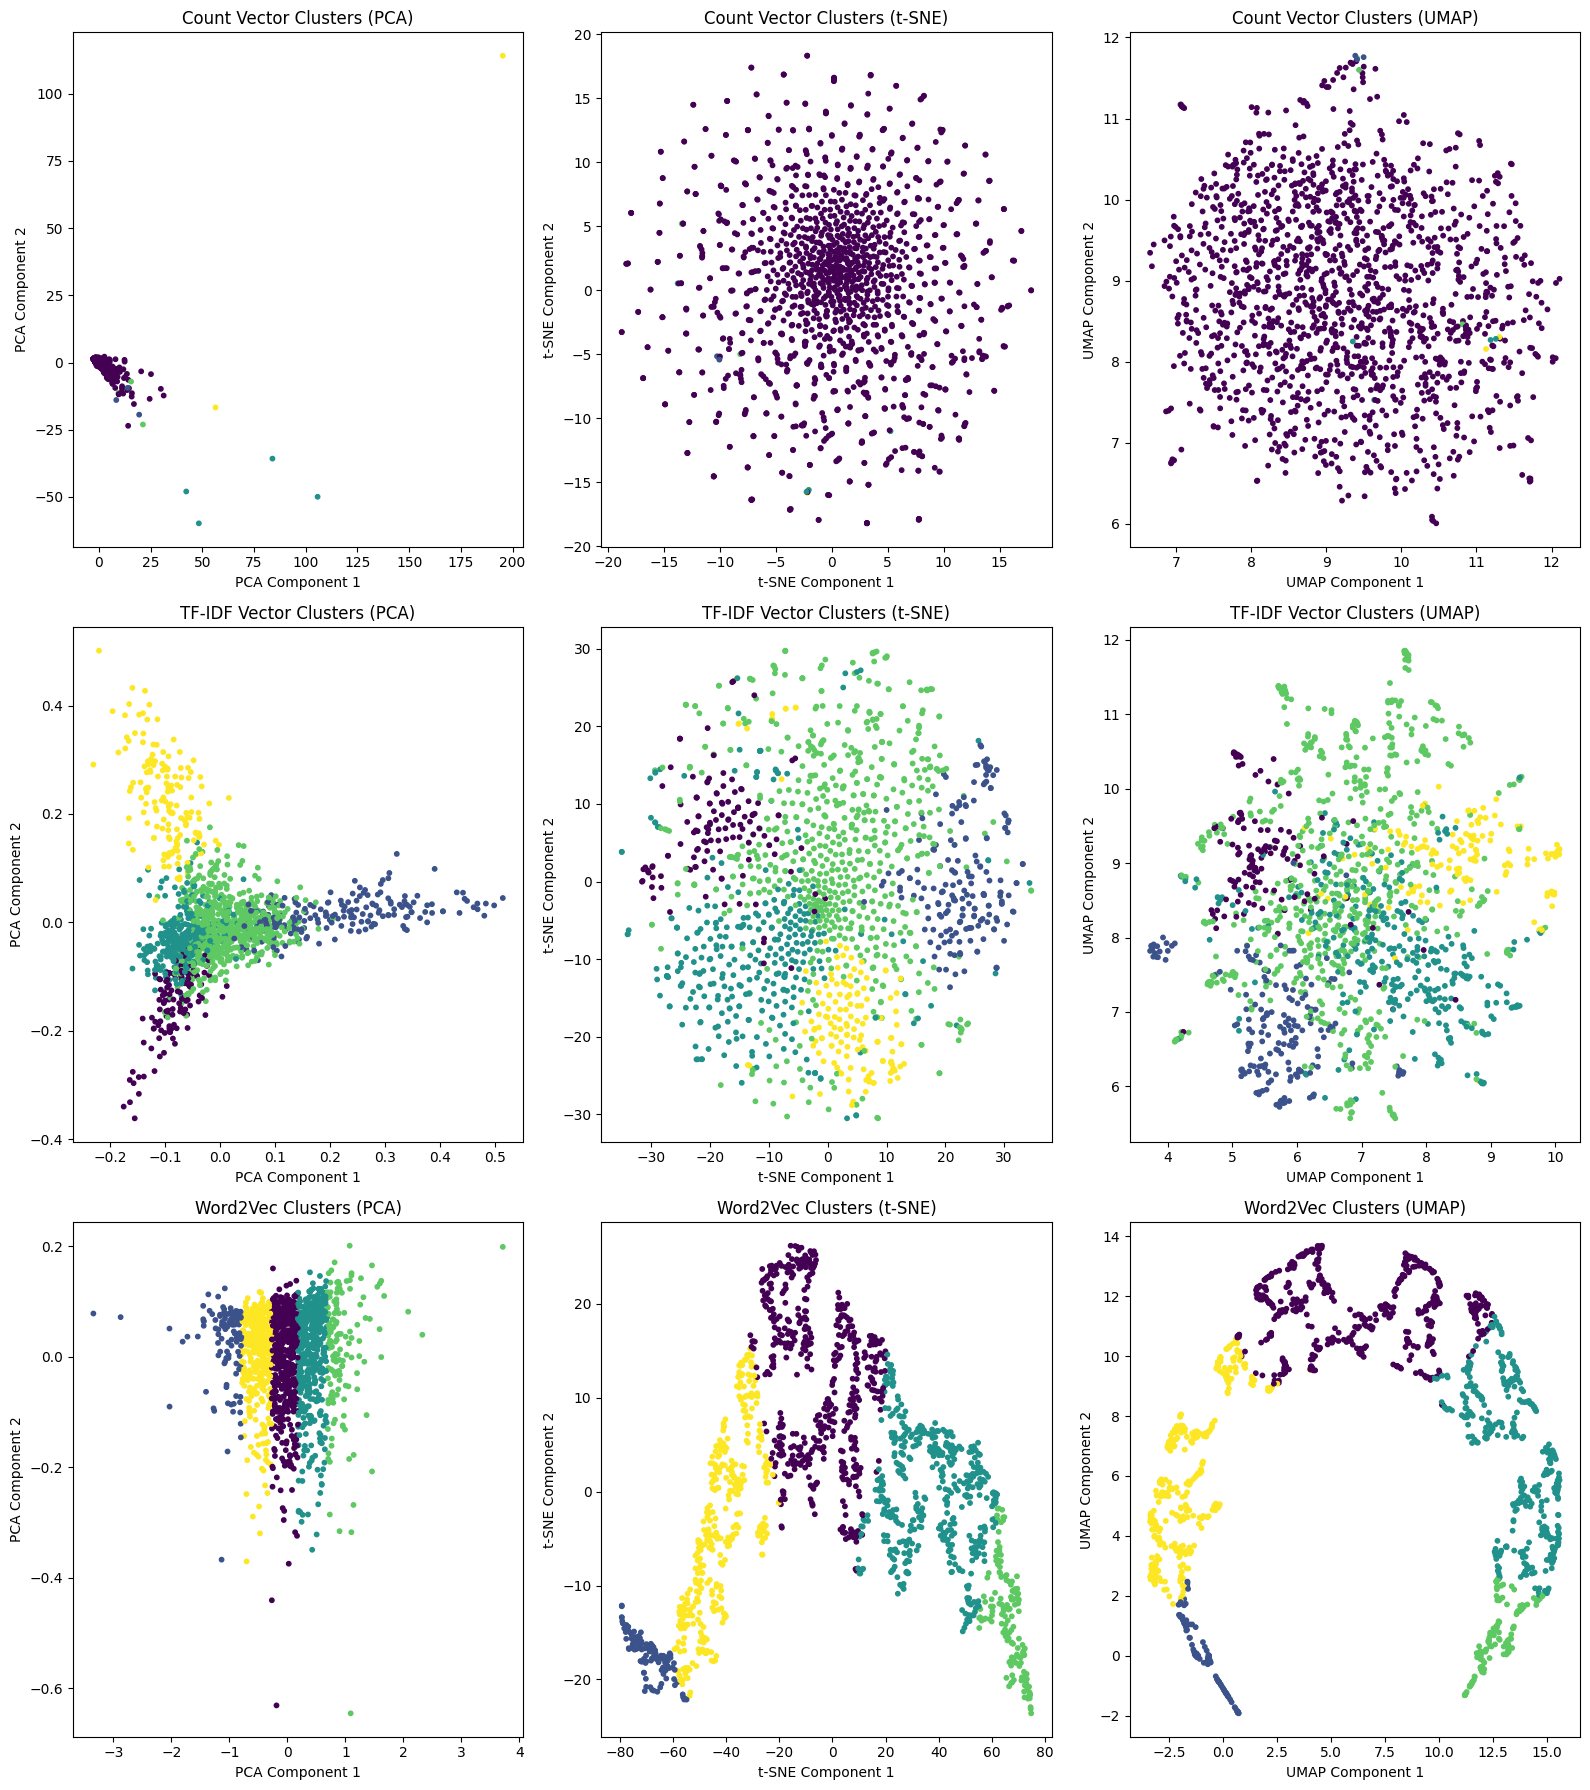

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for all vector types
vector_data = {
    "Count Vector": np.array(text_df['count_vector'].tolist()),
    "TF-IDF Vector": np.array(text_df['tfidf_vector'].tolist()),
    "Word2Vec": np.array(text_df['word2vec'].tolist())
}

vector_labels = {
    "Count Vector": text_df['count_vector_cluster'],
    "TF-IDF Vector": text_df['tfidf_vector_cluster'],
    "Word2Vec": text_df['word2vec_cluster']
}

# Create subplots for PCA and t-SNE visualizations
fig, axes = plt.subplots(len(vector_data), 3, figsize=(16, 18))

for i, (vector_name, data) in enumerate(vector_data.items()):
    labels = vector_labels[vector_name]

   
    # Apply PCA
    data_pca = apply_pca(data)

    # Apply t-SNE
    data_tsne = apply_tsne(data)

    # Apply UMAP
    umap_features = apply_umap(data)

    # PCA Visualization  
    plot_clusters(axes[i, 0], data_pca, labels, f"{vector_name} Clusters (PCA)", "PCA Component 1", "PCA Component 2")

    # t-SNE Visualization
    plot_clusters(axes[i, 1], data_tsne, labels, f"{vector_name} Clusters (t-SNE)", "t-SNE Component 1", "t-SNE Component 2")

    # UMAP Visualization
    plot_clusters(axes[i, 2], umap_features, labels, f"{vector_name} Clusters (UMAP)", "UMAP Component 1", "UMAP Component 2")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

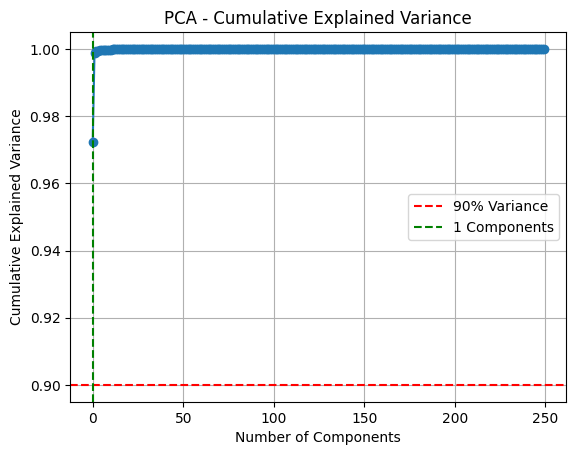

In [34]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Prepare Word2Vec data
word2vec_data = np.array(text_df['word2vec'].tolist())

# Fit PCA to the data
pca = PCA()
pca.fit_transform(word2vec_data)

  # Apply t-SNE
#tsne = TSNE()
#data_tsne = tsne.fit_transform(data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
#print("Explained Variance Ratio:", pca.explained_variance_ratio_," \n shape:",pca.explained_variance_ratio_.shape)
#print(f"Number of components to explain 90% variance: {n_components_90}")

# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=n_components_90 - 1, color='g', linestyle='--', label=f'{n_components_90} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Filter which document belongs to which cluster

In [35]:
# Filter documents belonging to a specific cluster (e.g., cluster 0)
revised_df= text_df.copy()
revised_df.drop(columns=['count_vector','tfidf_vector','count_vector_cluster','tfidf_vector_cluster'], inplace=True)


In [36]:
cluster_0_docs = revised_df[revised_df['word2vec_cluster'] == 0]
print(f"Documents in Cluster 0:")
cluster_0_docs

Documents in Cluster 0:


text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
9     \nIn article <15413@optilink.COM> cramer@optil...   
13    Nntp-Posting-Host: thor.isc-br.com\n\nIn artic...   
19    Distribution: usa\nNNTP-Posting-Host: nw12-326...   
25    Nntp-Posting-Host: logic.clarkson.edu\nX-Newsr...   
...                                                 ...   
1485  Nntp-Posting-Host: esun228\nX-Newsreader: TIN ...   
1487  \nI have two books, both NASA Special Publicat...   
1489  \n\n--\n\nI would like to be able to detect th...   
1493  \nIn article <1993Mar25.161909.8110@wuecl.wust...   
1494  \nAaron Lung (alung@megatest.com) wrote:\n: >I...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
9     article 15413optilinkcom crameroptilinkcom cla...   
13    nntppostinghost thoriscbrcom article 16apr1993...   
19    distribution usa nntppostinghost nw123261mited...   
25    nntppostinghost logicclarksonedu xnewsreader t...   
...                                                 ...   
1485  nntppostinghost esun228 xnewsreader tin versio...   
1487  two book nasa special publication voyager miss...   
1489  would like able detect angular position low ac...   
1493  article 1993mar251619098110wueclwustledu dpcec...   
1494  aaron lung alungmegatestcom wrote also sceptic...   

                                               word2vec  word2vec_cluster  
0     [0.2979326, -0.09470744, 0.27652314, 0.1407620...                 0  
9     [0.2880968, -0.10472352, 0.25495946, 0.1290473...                 0  
13    [0.3043118, -0.09624399, 0.28299525, 0.1446292...                 0  
19    [0.3050487, -0.097795285, 0.28294584, 0.142100...                 0  
25    [0.27885133, -0.08651087, 0.25743195, 0.131264...                 0  
...                                                 ...               ...  
1485  [0.30435365, -0.09457196, 0.2848302, 0.1450269...                 0  
1487  [0.27900732, -0.08610477, 0.26323545, 0.134007...                 0  
1489  [0.27902293, -0.084108844, 0.2638513, 0.135243...                 0  
1493  [0.2963531, -0.0938564, 0.2764888, 0.14117637,...                 0  
1494  [0.2891305, -0.08852644, 0.27215746, 0.1391993...                 0  

[487 rows x 4 columns]

In [37]:
cluster_4_docs = revised_df[revised_df['word2vec_cluster'] == 4]
print(f"Documents in Cluster 4:")
cluster_4_docs

Documents in Cluster 4:


text  \
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
5     Distribution: world\nNNTP-Posting-Host: kelvin...   
7     \nCharles Parr, on the Tue, 20 Apr 93 21:25:10...   
...                                                 ...   
1486  \n930418\n\nDo what thou wilt shall be the who...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  \
2     get little uv putting heavy uv filter deep pur...   
3     nntppostinghost accessdigexnet trouble trying ...   
4     understand new gps box option known differenti...   
5     distribution world nntppostinghost kelvinjplna...   
7     charles parr tue 20 apr 93 212510 gmt wibbled ...   
...                                                 ...   
1486  930418 thou wilt shall whole law honestly word...   
1495  nntppostinghost wcsubctstateuedu organization ...   
1497  article 79895cupportalcom thyagicupportalcom t...   
1498  3500 mile black leather tank bra tank bag corb...   
1499  nntppostinghost grissomlarcnasagov article 199...   

                                               word2vec  word2vec_cluster  
2     [0.2687637, -0.08219199, 0.25435835, 0.1310415...                 4  
3     [0.2585821, -0.07983959, 0.24063441, 0.1221529...                 4  
4     [0.2556265, -0.077565044, 0.24108788, 0.122407...                 4  
5     [0.26887828, -0.08845013, 0.24386697, 0.124774...                 4  
7     [0.26198956, -0.08242167, 0.24477166, 0.123206...                 4  
...                                                 ...               ...  
1486  [0.25179583, -0.077225044, 0.2370589, 0.120373...                 4  
1495  [0.2625057, -0.084070936, 0.24242881, 0.123814...                 4  
1497  [0.26982462, -0.08738898, 0.25116724, 0.127772...                 4  
1498  [0.24862792, -0.07660459, 0.23383783, 0.118432...                 4  
1499  [0.23892389, -0.080204554, 0.21466628, 0.11043...                 4  

[346 rows x 4 columns]

In [38]:
cluster_2_docs = revised_df[revised_df['word2vec_cluster'] == 2]
print(f"Documents in Cluster 2:")
cluster_2_docs

Documents in Cluster 2:


text  \
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
6     Nntp-Posting-Host: 144.124.112.30\n\n\nIn arti...   
11    \nfsset@bach.lerc.nasa.gov (Scott Townsend) wr...   
12    \nIn article <1993Apr16.131615.8661@desire.wri...   
15    \nIn article <1993Apr18.091051.14496@ke4zv.uuc...   
...                                                 ...   
1472  NNTP-Posting-Host: inst0027.cvm.msu.edu\n\nI a...   
1474  \nIn article <19930423.010821.639@almaden.ibm....   
1477  \nIn article <222834@mavenry.altcit.eskimo.com...   
1488  \nIn article <YAMAUCHI.93Apr21131325@yuggoth.c...   
1492  NNTP-Posting-Host: saltillo.cs.utexas.edu\nSum...   

                                         processed_text  \
1     article 1993apr191311027843rchlandibmcom xzz02...   
6     nntppostinghost 14412411230 article 1993apr320...   
11    fssetbachlercnasagov scott townsend writes got...   
12    article 1993apr161316158661desirewrightedu dem...   
15    article 1993apr1809105114496ke4zvuucp garyke4z...   
...                                                 ...   
1472  nntppostinghost inst0027cvmmsuedu involved mic...   
1474  article 19930423010821639almadenibmcom nichovn...   
1477  article 222834mavenryaltciteskimocom mavenmave...   
1488  article yamauchi93apr21131325yuggothcescwruedu...   
1492  nntppostinghost saltillocsutexasedu summary sp...   

                                               word2vec  word2vec_cluster  
1     [0.3499984, -0.11608437, 0.32410586, 0.1639255...                 2  
6     [0.31104022, -0.110245295, 0.27545074, 0.13924...                 2  
11    [0.34546268, -0.108058736, 0.32123333, 0.16361...                 2  
12    [0.31803402, -0.10236466, 0.29489037, 0.150321...                 2  
15    [0.34621364, -0.11069447, 0.32150018, 0.165354...                 2  
...                                                 ...               ...  
1472  [0.3351278, -0.103845775, 0.30802426, 0.157935...                 2  
1474  [0.3358383, -0.10917743, 0.3113872, 0.15929985...                 2  
1477  [0.322702, -0.10483768, 0.2995358, 0.15300527,...                 2  
1488  [0.32625464, -0.10124539, 0.30677357, 0.156097...                 2  
1492  [0.3333326, -0.10398997, 0.3129521, 0.15856844...                 2  

[418 rows x 4 columns]

# Visualize Silhouette Scores for Each Cluster

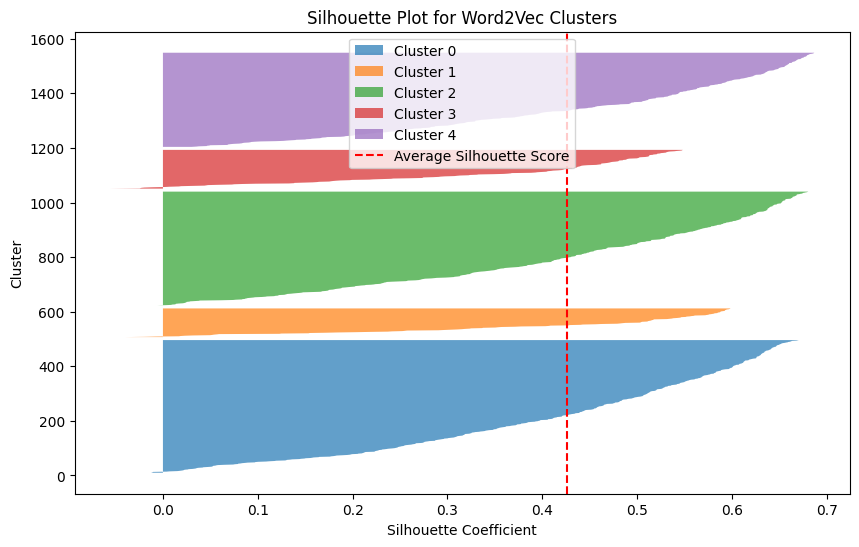

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples


word2vec_data = np.array(revised_df['word2vec'].tolist())
word2vec_labels= np.array(revised_df['word2vec_cluster'].tolist())
# Calculate silhouette scores for each document
silhouette_values = silhouette_samples(word2vec_data, word2vec_labels)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):  # Assuming 5 clusters
    ith_cluster_silhouette_values = silhouette_values[word2vec_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
        label=f"Cluster {i}"
    )
    y_lower = y_upper + 10  # Add space between clusters

plt.axvline(x=silhouette_values.mean(), color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for Word2Vec Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.show()

# Selective resampling:
1. Oversample Minority Clusters: using SMOTE
2. Undersampling Majority clusters: 

/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


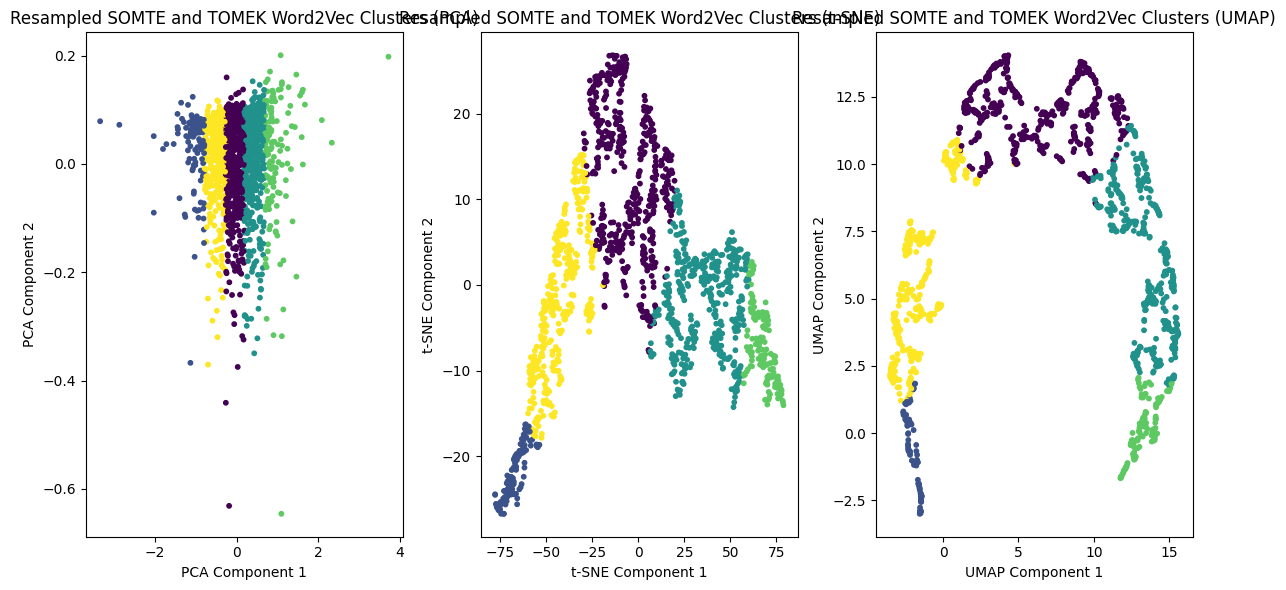

In [40]:
# Resampling 

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Extract Word2Vec data and cluster labels from revised_df
word2vec_data = np.array(revised_df['word2vec'].tolist())
word2vec_labels = np.array(revised_df['word2vec_cluster'].tolist())

# Apply Tomek Links resampling
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(word2vec_data, word2vec_labels)



resampled_df = pd.DataFrame({
    're_word2vec': list(X_resampled),
    're_word2vec_cluster': list(y_resampled)
})


# Apply PCA and t-SNE on the resampled data
pca_data = apply_pca(X_resampled)
tsne_data = apply_tsne(X_resampled)
apply_umap_data = apply_umap(X_resampled)

# Create subplots for PCA and t-SNE visualizations
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot PCA
plot_clusters(
    ax=axes[0],
    data=pca_data,
    labels=y_resampled,
    title="Resampled SOMTE and TOMEK Word2Vec Clusters (PCA)",
    xlabel="PCA Component 1",
    ylabel="PCA Component 2"
)

# Plot t-SNE
plot_clusters(
    ax=axes[1],
    data=tsne_data,
    labels=y_resampled,
    title="Resampled SOMTE and TOMEK Word2Vec Clusters (t-SNE)",
    xlabel="t-SNE Component 1",
    ylabel="t-SNE Component 2"
)

# Plot UMAP
plot_clusters(
    ax=axes[2],
    data=apply_umap_data,
    labels=y_resampled,
    title="Resampled SOMTE and TOMEK Word2Vec Clusters (UMAP)",
    xlabel="UMAP Component 1",
    ylabel="UMAP Component 2"
)

# Show plots
plt.tight_layout()
plt.show()


In [41]:
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
resampled_df['re_word2vec_cluster'] = kmeans_word2vec.fit_predict(np.array(resampled_df['re_word2vec'].tolist()))
kmeans_word2vec_lables = kmeans_word2vec.labels_

summary_metrics = pd.DataFrame({
    "Vector Method": ["word2vec"],
    "Inertia": [
        kmeans_word2vec.inertia_
    ],
    "Silhouette Score": [
        silhouette_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(np.array(resampled_df['re_word2vec'].tolist()), kmeans_word2vec_lables)
    ]
})

summary_metrics

Vector Method    Inertia  Silhouette Score  Calinski-Harabasz Index  \
0      word2vec  70.698112          0.438658               2179.08022   

   Davies-Bouldin Index  
0              0.681092

due to resampling performance metrices of the model drops, so dropping the resampling and 
If class imbalance is a concern for classification:
1. Use classifier-level techniques like class weights
2. Try probability calibration methods
3. Consider ensemble methods that handle imbalance well (like XGBoost)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns

def min_sample_leaf(df, target_column):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier

    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    param_grid = {'min_samples_leaf': [1, 2, 5, 10, 20]}
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])


def evaluate_model(df, target_column, classifier):
    """
    Splits the data, trains the provided classifier, and evaluates the model.
    
    Parameters:
        df (pd.DataFrame): The encoded DataFrame.
        target_column (str): The target column name.
        classifier: The classifier to be used for training and prediction.
    
    Returns:
        float: Overall accuracy.
        pd.DataFrame: DataFrame containing precision, recall, F1-score, and accuracy.
        np.ndarray: Confusion matrix.
        np.ndarray: Predicted probabilities.
        np.ndarray: True labels.
    """
    # Split data into features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    
    # Train the provided classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    y_proba = classifier.predict_proba(X_test) if hasattr(classifier, "predict_proba") else None
    
    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose()
    overall_accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return overall_accuracy, metrics_df, conf_matrix, y_proba, y_test

def plot_confusion_matrix(ax, conf_matrix, title, xticklabels):
        """
        Plots a confusion matrix on the given axes.

        Parameters:
            ax (matplotlib.axes.Axes): Axes object to plot on.
            conf_matrix (numpy.ndarray): Confusion matrix to plot.
            title (str): Title of the plot.
            xticklabels (list): Labels for the x-axis.
            yticklabels (list): Labels for the y-axis.
        """
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xticklabels, yticklabels=xticklabels, ax=ax)
        ax.set_title(title)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")


In [50]:
revised_df

text  \
0     \nIn article <93089.204431GRV101@psuvm.psu.edu...   
1     \nIn article <1993Apr19.131102.7843@rchland.ib...   
2     \nYou can get a *little* UV by putting a heavy...   
3     NNTP-Posting-Host: access.digex.net\n\nThe tro...   
4     \n\n\nI understand that the new GPS boxes now ...   
...                                                 ...   
1495  Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...   
1496  \nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...   
1497  \nIn article <79895@cup.portal.com>, Thyagi@cu...   
1498  \n3500 miles, black leather tank bra, tank bag...   
1499  NNTP-Posting-Host: grissom.larc.nasa.gov\n\nIn...   

                                         processed_text  \
0     article 93089204431grv101psuvmpsuedu callec dr...   
1     article 1993apr191311027843rchlandibmcom xzz02...   
2     get little uv putting heavy uv filter deep pur...   
3     nntppostinghost accessdigexnet trouble trying ...   
4     understand new gps box option known differenti...   
...                                                 ...   
1495  nntppostinghost wcsubctstateuedu organization ...   
1496  c5tvl21inhermeshrzunibielefeldde hoovermathema...   
1497  article 79895cupportalcom thyagicupportalcom t...   
1498  3500 mile black leather tank bra tank bag corb...   
1499  nntppostinghost grissomlarcnasagov article 199...   

                                               word2vec  word2vec_cluster  
0     [0.2979326, -0.09470744, 0.27652314, 0.1407620...                 0  
1     [0.3499984, -0.11608437, 0.32410586, 0.1639255...                 2  
2     [0.2687637, -0.08219199, 0.25435835, 0.1310415...                 4  
3     [0.2585821, -0.07983959, 0.24063441, 0.1221529...                 4  
4     [0.2556265, -0.077565044, 0.24108788, 0.122407...                 4  
...                                                 ...               ...  
1495  [0.2625057, -0.084070936, 0.24242881, 0.123814...                 4  
1496  [0.37250063, -0.11673139, 0.34799862, 0.176901...                 3  
1497  [0.26982462, -0.08738898, 0.25116724, 0.127772...                 4  
1498  [0.24862792, -0.07660459, 0.23383783, 0.118432...                 4  
1499  [0.23892389, -0.080204554, 0.21466628, 0.11043...                 4  

[1500 rows x 4 columns]

In [51]:
# Ensure umap_features is defined
if 'umap_features' not in locals():
	umap_features = apply_umap(np.array(revised_df['word2vec'].tolist()))

if 'tsene_features' not in locals():
    tsne_features = apply_tsne(np.array(revised_df['word2vec'].tolist()))

# Create DataFrame for t-SNE features
tsne_df = pd.DataFrame(tsne_features, columns=['tsne_feature_1', 'tsne_feature_2'])
tsne_df['word2vec_cluster'] = revised_df['word2vec_cluster']

# Create DataFrame for UMAP features
umap_df = pd.DataFrame(umap_features, columns=['umap_feature_1', 'umap_feature_2'])
umap_df['word2vec_cluster'] = revised_df['word2vec_cluster']

# Display the DataFrames
print("\n \t \t \t\t\tt-SNE DataFrame:")
display(tsne_df)

print("\n\t\t\t\t\tUMAP DataFrame:")
display(umap_df)


 	 	 			t-SNE DataFrame:


tsne_feature_1  tsne_feature_2  word2vec_cluster
0           0.594322       12.013839                 0
1          55.112782       -6.568740                 2
2         -35.126965       13.460748                 4
3         -39.121334       -0.402395                 4
4         -44.259754        0.162337                 4
...              ...             ...               ...
1495      -34.598343        0.740903                 4
1496       67.519196      -11.504982                 3
1497      -27.322508        7.187666                 4
1498      -48.909302       -5.711923                 4
1499      -47.311943      -16.974001                 4

[1500 rows x 3 columns]


					UMAP DataFrame:


umap_feature_1  umap_feature_2  word2vec_cluster
0           8.023705       12.238572                 0
1          13.954366        3.094720                 2
2          -0.145794        9.912138                 4
3          -1.474775        7.159741                 4
4          -2.433783        6.839233                 4
...              ...             ...               ...
1495       -0.641285        7.476986                 4
1496       13.112561        0.433957                 3
1497        1.341658        9.308455                 4
1498       -3.195668        4.841119                 4
1499       -1.728953        3.450269                 4

[1500 rows x 3 columns]


					 Evaluating for T-SNE features...
Evaluating Random Forest...
Overall Accuracy for Random Forest: 0.9933
 
 Classification Report:


precision    recall  f1-score     support
0              0.986395  0.993151  0.989761  146.000000
1              1.000000  1.000000  1.000000   32.000000
2              1.000000  0.992000  0.995984  125.000000
3              1.000000  1.000000  1.000000   43.000000
4              0.990385  0.990385  0.990385  104.000000
accuracy       0.993333  0.993333  0.993333    0.993333
macro avg      0.995356  0.995107  0.995226  450.000000
weighted avg   0.993364  0.993333  0.993340  450.000000

Evaluating SVM classifier1...
Overall Accuracy for SVM classifier1: 0.9222
 
 Classification Report:


precision    recall  f1-score     support
0              0.951389  0.938356  0.944828  146.000000
1              0.800000  1.000000  0.888889   32.000000
2              0.972727  0.856000  0.910638  125.000000
3              0.796296  1.000000  0.886598   43.000000
4              0.941176  0.923077  0.932039  104.000000
accuracy       0.922222  0.922222  0.922222    0.922222
macro avg      0.892318  0.943487  0.912598  450.000000
weighted avg   0.929371  0.922222  0.922833  450.000000

Evaluating SVM classifier2...
Overall Accuracy for SVM classifier2: 0.9356
 
 Classification Report:


precision    recall  f1-score     support
0              0.958042  0.938356  0.948097  146.000000
1              0.800000  1.000000  0.888889   32.000000
2              0.957627  0.904000  0.930041  125.000000
3              0.877551  1.000000  0.934783   43.000000
4              0.960000  0.923077  0.941176  104.000000
accuracy       0.935556  0.935556  0.935556    0.935556
macro avg      0.910644  0.953087  0.928597  450.000000
weighted avg   0.939449  0.935556  0.935999  450.000000

Evaluating Neural Network classifier 1...
Overall Accuracy for Neural Network classifier 1: 0.7733
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


precision    recall  f1-score     support
0              0.852349  0.869863  0.861017  146.000000
1              0.515152  0.531250  0.523077   32.000000
2              0.744966  0.888000  0.810219  125.000000
3              0.720000  0.418605  0.529412   43.000000
4              0.797872  0.721154  0.757576  104.000000
accuracy       0.773333  0.773333  0.773333    0.773333
macro avg      0.726068  0.685774  0.696260  450.000000
weighted avg   0.773305  0.773333  0.767282  450.000000

Evaluating Neural Network classifier 3...
Overall Accuracy for Neural Network classifier 3: 0.7711
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-de

precision    recall  f1-score     support
0              0.893333  0.917808  0.905405  146.000000
1              0.000000  0.000000  0.000000   32.000000
2              0.696429  0.936000  0.798635  125.000000
3              0.000000  0.000000  0.000000   43.000000
4              0.727273  0.923077  0.813559  104.000000
accuracy       0.771111  0.771111  0.771111    0.771111
macro avg      0.463407  0.555377  0.503520  450.000000
weighted avg   0.651370  0.771111  0.703619  450.000000

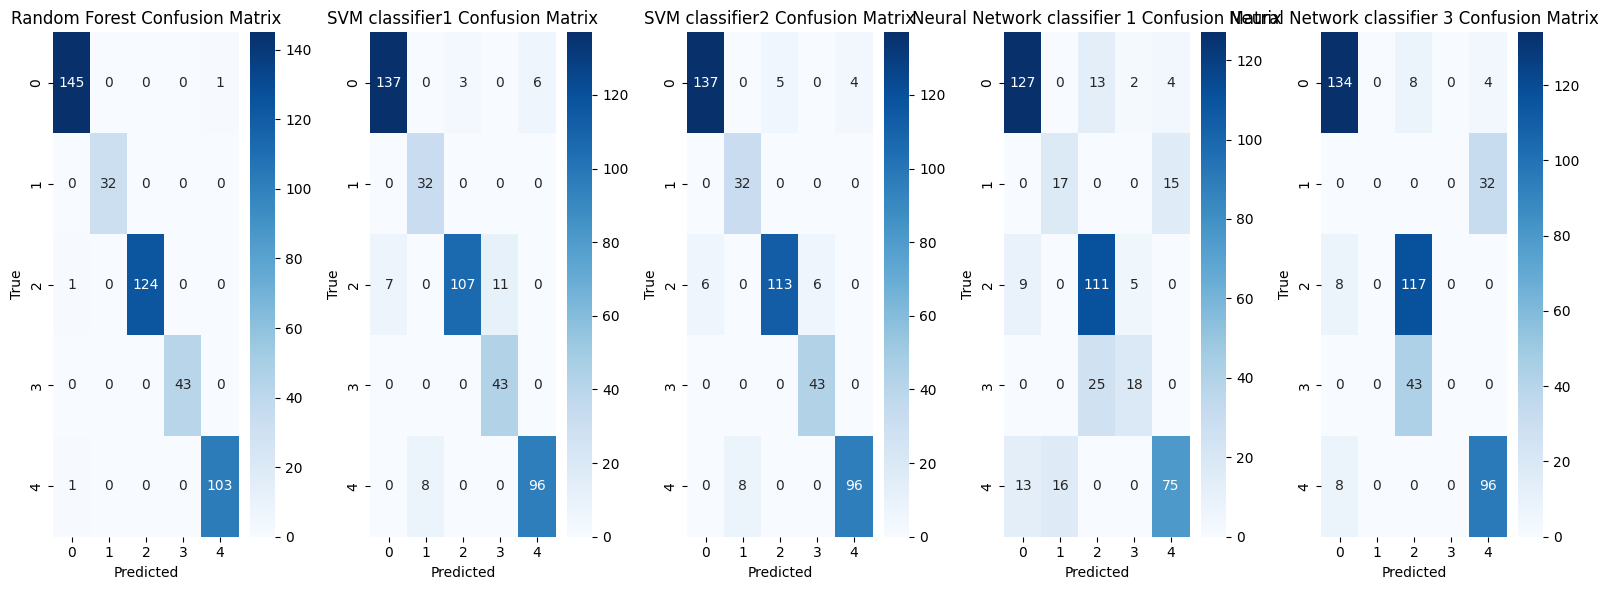


					Evaluating for UMAP features...
Evaluating Random Forest...
Overall Accuracy for Random Forest: 0.9756
 
 Classification Report:


precision    recall  f1-score     support
0              0.973154  0.993151  0.983051  146.000000
1              0.914286  1.000000  0.955224   32.000000
2              0.975610  0.960000  0.967742  125.000000
3              0.976190  0.953488  0.964706   43.000000
4              1.000000  0.971154  0.985366  104.000000
accuracy       0.975556  0.975556  0.975556    0.975556
macro avg      0.967848  0.975559  0.971218  450.000000
weighted avg   0.976145  0.975556  0.975602  450.000000

Evaluating SVM classifier1...
Overall Accuracy for SVM classifier1: 0.9578
 
 Classification Report:


precision    recall  f1-score     support
0              0.959184  0.965753  0.962457  146.000000
1              0.888889  1.000000  0.941176   32.000000
2              0.991379  0.920000  0.954357  125.000000
3              0.914894  1.000000  0.955556   43.000000
4              0.961538  0.961538  0.961538  104.000000
accuracy       0.957778  0.957778  0.957778    0.957778
macro avg      0.943177  0.969458  0.955017  450.000000
weighted avg   0.959440  0.957778  0.957822  450.000000

Evaluating SVM classifier2...
Overall Accuracy for SVM classifier2: 0.9600
 
 Classification Report:


precision    recall  f1-score  support
0              0.965753  0.965753  0.965753   146.00
1              0.888889  1.000000  0.941176    32.00
2              0.991453  0.928000  0.958678   125.00
3              0.914894  1.000000  0.955556    43.00
4              0.961538  0.961538  0.961538   104.00
accuracy       0.960000  0.960000  0.960000     0.96
macro avg      0.944505  0.971058  0.956540   450.00
weighted avg   0.961592  0.960000  0.960092   450.00

Evaluating Neural Network classifier 1...
Overall Accuracy for Neural Network classifier 1: 0.9778
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


precision    recall  f1-score     support
0              0.993151  0.993151  0.993151  146.000000
1              1.000000  0.968750  0.984127   32.000000
2              0.939850  1.000000  0.968992  125.000000
3              1.000000  0.837209  0.911392   43.000000
4              0.990385  0.990385  0.990385  104.000000
accuracy       0.977778  0.977778  0.977778    0.977778
macro avg      0.984677  0.957899  0.969609  450.000000
weighted avg   0.978847  0.977778  0.977347  450.000000

Evaluating Neural Network classifier 3...
Overall Accuracy for Neural Network classifier 3: 0.8644
 
 Classification Report:


/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ruksad/Documents/learn/AIandContent/GL-selflearning/descriptive-stats/lectures/gradedAssignments/prog_ml_ds/nlocal/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-de

precision    recall  f1-score     support
0              0.928571  0.979452  0.953333  146.000000
1              0.000000  0.000000  0.000000   32.000000
2              0.871429  0.976000  0.920755  125.000000
3              1.000000  0.651163  0.788732   43.000000
4              0.750000  0.923077  0.827586  104.000000
accuracy       0.864444  0.864444  0.864444    0.864444
macro avg      0.710000  0.705938  0.698081  450.000000
weighted avg   0.812222  0.864444  0.831701  450.000000

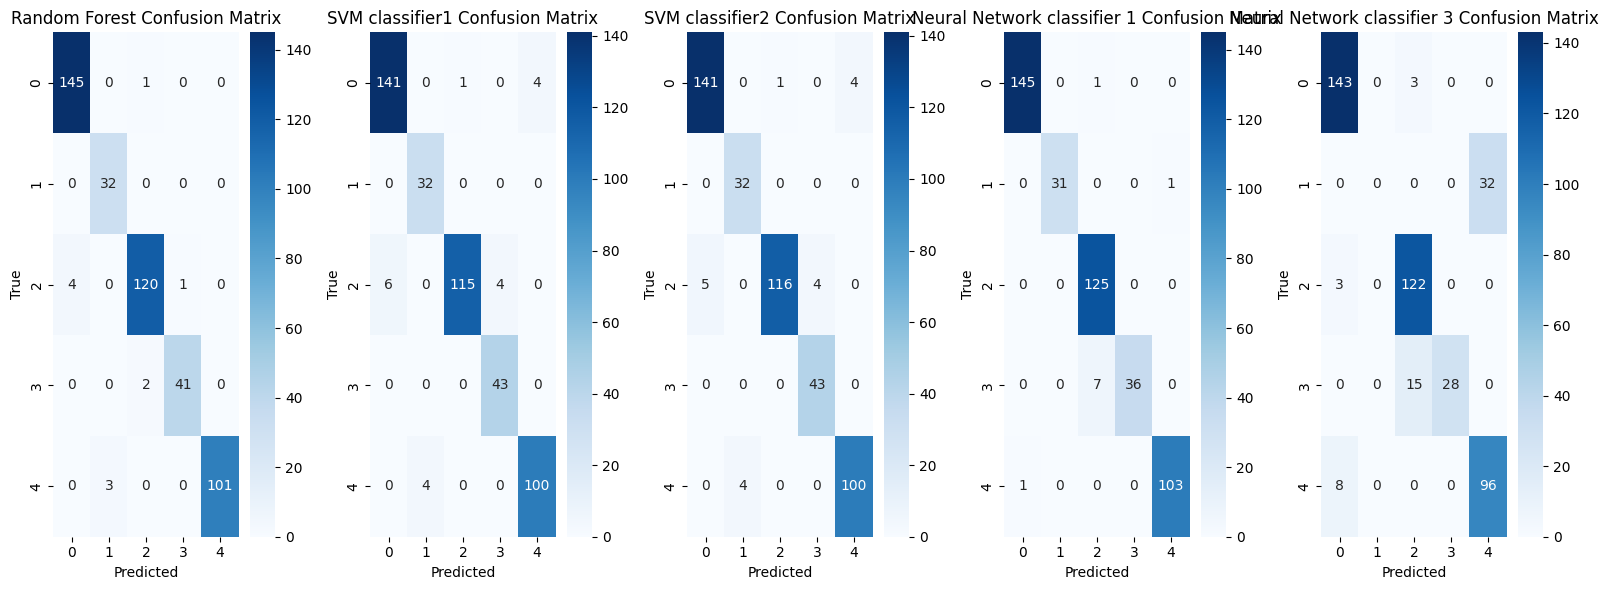

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

""" param_grid = {'min_samples_leaf': [1, 2, 5, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best min_samples_leaf:", grid_search.best_params_['min_samples_leaf'])
 """
def evaluate_and_plot_classifiers(tsne_df, classifiers, results_dict):
    """
    Evaluates classifiers on the given DataFrame and plots confusion matrices.

    Parameters:
        tsne_df (pd.DataFrame): DataFrame containing features and target.
        classifiers (dict): Dictionary of classifier names and instances.
        results_dict (dict): Dictionary to store evaluation results.

    Returns:
        None
    """
    # Smin_sample_leaf(tsne_df, 'word2vec_cluster')
    for name, clf in classifiers.items():
        print(f"Evaluating {name}...")
        overall_accuracy, metrics_df, conf_matrix, y_proba, y_test  = evaluate_model(tsne_df, 'word2vec_cluster', clf)
        
        # Store results in a dictionary
        results_dict[name] = {
            "overall_accuracy": overall_accuracy,
            "metrics_df": metrics_df,
            "conf_matrix": conf_matrix,
            "y_proba": y_proba,
            "y_test": y_test
        }

        print(f"Overall Accuracy for {name}: {overall_accuracy:.4f}")
        print(" \n Classification Report:")
        display(metrics_df)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, len(classifiers), figsize=(16, 6))
    for idx, (name, clf) in enumerate(classifiers.items()):
        # Retrieve confusion matrix and true labels
        conf_matrix = results_dict[name]['conf_matrix']
        y_test = results_dict[name]['y_test']

        # Plot confusion matrix
        plot_confusion_matrix(axes[idx], conf_matrix, f"{name} Confusion Matrix", np.unique(y_test))

    plt.tight_layout()
    plt.show()



# Scale the t-SNE features
scaler = StandardScaler()
tsne_df[['tsne_feature_1', 'tsne_feature_2']] = scaler.fit_transform(tsne_df[['tsne_feature_1', 'tsne_feature_2']])


classifiers = {
    
    "Random Forest": RandomForestClassifier(min_samples_leaf=2, class_weight='balanced', random_state=42),
    "SVM classifier1": SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),  # Enable probability for SVM
    "SVM classifier2": SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42),
    "Neural Network classifier 1": MLPClassifier(hidden_layer_sizes=(5),random_state=42),
    "Neural Network classifier 3": MLPClassifier(hidden_layer_sizes=(5,5),random_state=42),
    "Neural Network classifier 3": MLPClassifier(hidden_layer_sizes=(5,5,5),random_state=42)
}
results_dict = {}

print("\n\t\t\t\t\t Evaluating for T-SNE features...")
# Call the method
evaluate_and_plot_classifiers(tsne_df, classifiers, results_dict)

print("\n\t\t\t\t\tEvaluating for UMAP features...")

# Scale the Umap features
results_dict = {}
scaler = StandardScaler()
umap_df[['umap_feature_1', 'umap_feature_2']] = scaler.fit_transform(umap_df[['umap_feature_1', 'umap_feature_2']])
evaluate_and_plot_classifiers(umap_df, classifiers, results_dict)